In [1]:
#from google.colab import drive
import pandas as pd
#drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Colab Notebooks/IDX CLustering/Indonesia Stocks Market Data.csv'
df = pd.read_csv(PATH)

In [2]:
stocksdata = df.copy()

In [3]:
stocksdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391693 entries, 0 to 391692
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  391693 non-null  int64  
 1   Symbols     391693 non-null  object 
 2   Year        391693 non-null  object 
 3   Adj Close   391693 non-null  float64
 4   Close       391693 non-null  float64
 5   High        391693 non-null  float64
 6   Low         391693 non-null  float64
 7   Open        391693 non-null  float64
 8   Volume      391693 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 26.9+ MB


In [4]:
stocksdata.describe()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
count,391693.000000,3.916930e+05,3.916930e+05,3.916930e+05,3.916930e+05,3.916930e+05,3.916930e+05
mean,195846.000000,1.152718e+04,1.164247e+04,1.166074e+04,1.162313e+04,1.164229e+04,1.356018e+07
std,113072.173832,2.218711e+05,2.218721e+05,2.218723e+05,2.218720e+05,2.218721e+05,9.640380e+07
min,0.000000,3.114825e+00,3.141000e+00,3.266000e+00,3.141000e+00,3.266000e+00,0.000000e+00
25%,97923.000000,1.800000e+02,1.820000e+02,1.860000e+02,1.800000e+02,1.820000e+02,1.000000e+02
50%,195846.000000,4.349542e+02,4.520000e+02,4.580000e+02,4.460000e+02,4.520000e+02,6.359600e+04
75%,293769.000000,1.295000e+03,1.360000e+03,1.380000e+03,1.350000e+03,1.360000e+03,2.754600e+06
max,391692.000000,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,6.743731e+09


In [5]:
stocksdata.isnull().sum()

Unnamed: 0    0
Symbols       0
Year          0
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume        0
dtype: int64

In [6]:
del stocksdata['Unnamed: 0']

In [7]:
stocksdata['Symbols'] = stocksdata['Symbols'].str.replace('.JK', '')
stocksdata

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Symbols,Year,Adj Close,Close,High,Low,Open,Volume
0,ABBA,2017-01-02,50.000000,50.0,50.0,50.0,50.0,0.0
1,ABBA,2017-01-03,50.000000,50.0,50.0,50.0,50.0,1000.0
2,ABBA,2017-01-04,50.000000,50.0,50.0,50.0,50.0,95400.0
3,ABBA,2017-01-05,50.000000,50.0,51.0,50.0,50.0,115900.0
4,ABBA,2017-01-06,51.000000,51.0,51.0,50.0,50.0,25000.0
...,...,...,...,...,...,...,...,...
391688,WSKT,2019-12-20,1482.848633,1490.0,1515.0,1490.0,1510.0,38220400.0
391689,WSKT,2019-12-23,1487.824585,1495.0,1510.0,1485.0,1500.0,24295800.0
391690,WSKT,2019-12-26,1467.920532,1475.0,1520.0,1470.0,1510.0,42013200.0
391691,WSKT,2019-12-27,1472.896606,1480.0,1485.0,1460.0,1480.0,35149400.0


In [8]:
stocksdata['Symbols'].nunique()

508

In [9]:
dict = {'Symbols': 'Emiten_Code',
        'Year': 'Date',
        'Adj Close': 'Adj_Close'}

stocksdata.rename(columns=dict,inplace=True)

In [10]:
stocksdata['Date'] = pd.to_datetime(stocksdata['Date'])

In [11]:
stocksdata['Year'] = stocksdata['Date'].dt.year

In [12]:
# calculate daily percentage change
stocksdata['Change'] = stocksdata['Close'] / stocksdata['Close'].shift(1) - 1
stocksdata[:5]

,Emiten_Code,Date,Adj_Close,Close,High,Low,Open,Volume,Year,Change
0,ABBA,2017-01-02,50.0,50.0,50.0,50.0,50.0,0.0,2017,NaN
1,ABBA,2017-01-03,50.0,50.0,50.0,50.0,50.0,1000.0,2017,0.00
2,ABBA,2017-01-04,50.0,50.0,50.0,50.0,50.0,95400.0,2017,0.00
3,ABBA,2017-01-05,50.0,50.0,51.0,50.0,50.0,115900.0,2017,0.00
4,ABBA,2017-01-06,51.0,51.0,51.0,50.0,50.0,25000.0,2017,0.02


# **Volatility**

In [14]:
grouped= stocksdata.groupby(["Emiten_Code", "Year"])['Change'].std()
grouped

Emiten_Code  Year
AALI         2017    13.971410
             2018     0.021353
             2019     0.018299
ABBA         2017     0.007558
             2018     0.069875
                       ...    
YULE         2018     0.046535
             2019     0.079078
ZBRA         2017     0.058198
             2018     0.000000
             2019     0.032040
Name: Change, Length: 1522, dtype: float64

In [15]:
grouped.reset_index()

,Emiten_Code,Year,Change
0,AALI,2017,13.971410
1,AALI,2018,0.021353
2,AALI,2019,0.018299
3,ABBA,2017,0.007558
4,ABBA,2018,0.069875
...,...,...,...
1517,YULE,2018,0.046535
1518,YULE,2019,0.079078
1519,ZBRA,2017,0.058198
1520,ZBRA,2018,0.000000


In [16]:
volatility = pd.DataFrame(grouped)

In [17]:
volatility.rename(columns={'Change': 'sd_close'}, inplace=True)
volatility.head()

sd_close
Emiten_Code Year           
AALI        2017  13.971410
            2018   0.021353
            2019   0.018299
ABBA        2017   0.007558
            2018   0.069875

In [18]:
volatility.reset_index(inplace=True)

In [19]:
volatility.sort_values("sd_close", ascending=False)

,Emiten_Code,Year,sd_close
213,BCIC,2017,2091.456605
971,MLBI,2017,14.682428
154,ATIC,2018,14.127219
0,AALI,2017,13.971410
1192,RDTX,2017,9.164738
...,...,...,...
412,CNKO,2019,0.000000
1151,PSKT,2018,0.000000
1233,SCPI,2019,0.000000
1232,SCPI,2018,0.000000


In [20]:
# do the pivot
close = stocksdata[['Emiten_Code', 'Date', 'Close']]

In [21]:
close.set_index("Emiten_Code", inplace=True)

In [22]:
close

,Date,Close
Emiten_Code,,
ABBA,2017-01-02,50.0
ABBA,2017-01-03,50.0
ABBA,2017-01-04,50.0
ABBA,2017-01-05,50.0
ABBA,2017-01-06,51.0
...,...,...
WSKT,2019-12-20,1490.0
WSKT,2019-12-23,1495.0
WSKT,2019-12-26,1475.0


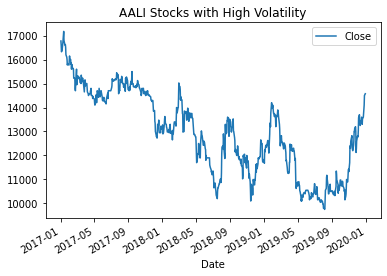

In [23]:
close.loc['AALI'].plot(x="Date", y="Close", title="AALI Stocks with High Volatility")

# **LIQUIDITY**

In [ ]:
Emiten_Profile = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IDX CLustering/daftar_saham.csv')
Emiten_Profile.head()

,Code,Name,ListingDate,Shares,ListingBoard,sector
0,ABBA,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE
1,AGAR,Asia Sejahtera Mina Tbk.,2019-12-02T00:00:00,1000000000,Pengembangan,TRADE
2,AIMS,Akbar Indo Makmur Stimec Tbk,2001-07-20T00:00:00,220000000,PENGEMBANGAN,TRADE
3,AKKU,Anugerah Kagum Karya Utama Tbk,2004-11-01T00:00:00,6449463636,PENGEMBANGAN,TRADE
4,APII,Arita Prima Indonesia Tbk.,2013-10-29T00:00:00,1075760000,PENGEMBANGAN,TRADE


In [ ]:
Emiten_Profile.rename(columns={'Code': 'Emiten_Code'}, inplace=True)
Emiten_Profile.head()

,Emiten_Code,Name,ListingDate,Shares,ListingBoard,sector
0,ABBA,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE
1,AGAR,Asia Sejahtera Mina Tbk.,2019-12-02T00:00:00,1000000000,Pengembangan,TRADE
2,AIMS,Akbar Indo Makmur Stimec Tbk,2001-07-20T00:00:00,220000000,PENGEMBANGAN,TRADE
3,AKKU,Anugerah Kagum Karya Utama Tbk,2004-11-01T00:00:00,6449463636,PENGEMBANGAN,TRADE
4,APII,Arita Prima Indonesia Tbk.,2013-10-29T00:00:00,1075760000,PENGEMBANGAN,TRADE


In [ ]:
Liq = stocksdata.merge(Emiten_Profile, on='Emiten_Code', how='left')
Liq.head()

,Emiten_Code,Date,Adj_Close,Close,High,Low,Open,Volume,Year,Change,Name,ListingDate,Shares,ListingBoard,sector
0,ABBA,2017-01-02,50.0,50.0,50.0,50.0,50.0,0.0,2017,NaN,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE
1,ABBA,2017-01-03,50.0,50.0,50.0,50.0,50.0,1000.0,2017,0.00,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE
2,ABBA,2017-01-04,50.0,50.0,50.0,50.0,50.0,95400.0,2017,0.00,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE
3,ABBA,2017-01-05,50.0,50.0,51.0,50.0,50.0,115900.0,2017,0.00,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE
4,ABBA,2017-01-06,51.0,51.0,51.0,50.0,50.0,25000.0,2017,0.02,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE


In [ ]:
Liquidity = Liq.copy() 
Liquidity.drop(["Name","ListingDate", "ListingBoard", "sector","Year","Adj_Close", "Close", "High", "Low","Open", "Change"],axis=1, inplace=True)
Liquidity.head()

,Emiten_Code,Date,Volume,Shares
0,ABBA,2017-01-02,0.0,2755125000
1,ABBA,2017-01-03,1000.0,2755125000
2,ABBA,2017-01-04,95400.0,2755125000
3,ABBA,2017-01-05,115900.0,2755125000
4,ABBA,2017-01-06,25000.0,2755125000


In [ ]:
Liquidity['Year'] = Liquidity['Date'].dt.year
Liquidity.head()

,Emiten_Code,Date,Volume,Shares,Year
0,ABBA,2017-01-02,0.0,2755125000,2017
1,ABBA,2017-01-03,1000.0,2755125000,2017
2,ABBA,2017-01-04,95400.0,2755125000,2017
3,ABBA,2017-01-05,115900.0,2755125000,2017
4,ABBA,2017-01-06,25000.0,2755125000,2017


In [ ]:
Liquidity.drop("Date", axis=1, inplace=True)

In [ ]:
Liquidity.head()

,Emiten_Code,Volume,Shares,Year
0,ABBA,0.0,2755125000,2017
1,ABBA,1000.0,2755125000,2017
2,ABBA,95400.0,2755125000,2017
3,ABBA,115900.0,2755125000,2017
4,ABBA,25000.0,2755125000,2017


In [ ]:
Liquidity['med_vol'] = Liquidity['Volume'] / Liquidity['Shares']*100
Liquidity.head()

,Emiten_Code,Volume,Shares,Year,med_vol
0,ABBA,0.0,2755125000,2017,0.000000
1,ABBA,1000.0,2755125000,2017,0.000036
2,ABBA,95400.0,2755125000,2017,0.003463
3,ABBA,115900.0,2755125000,2017,0.004207
4,ABBA,25000.0,2755125000,2017,0.000907


In [ ]:
lgrouped = Liquidity.groupby(["Emiten_Code", "Year"])['med_vol'].median()
lgrouped

Emiten_Code  Year
AALI         2017    0.043038
             2018    0.044501
             2019    0.030834
ABBA         2017    0.000082
             2018    0.022543
                       ...   
YULE         2018    0.000000
             2019    0.000028
ZBRA         2017    0.000000
             2018    0.000000
             2019    0.000000
Name: med_vol, Length: 1522, dtype: float64

In [ ]:
lgrouped.reset_index()

,Emiten_Code,Year,med_vol
0,AALI,2017,0.043038
1,AALI,2018,0.044501
2,AALI,2019,0.030834
3,ABBA,2017,0.000082
4,ABBA,2018,0.022543
...,...,...,...
1517,YULE,2018,0.000000
1518,YULE,2019,0.000028
1519,ZBRA,2017,0.000000
1520,ZBRA,2018,0.000000


In [ ]:
liquidity = pd.DataFrame(lgrouped)
liquidity.head()


med_vol
Emiten_Code Year          
AALI        2017  0.043038
            2018  0.044501
            2019  0.030834
ABBA        2017  0.000082
            2018  0.022543

In [ ]:
liquidity.reset_index(inplace=True)

In [ ]:
liquidity.set_index("Emiten_Code",inplace=True)


In [ ]:
liquidity.loc['POOL']

,Year,med_vol
Emiten_Code,,
POOL,2017,0.000940
POOL,2018,1.454407
POOL,2019,3.229766


In [ ]:
liquidity.reset_index(inplace=True)

In [ ]:
liquidity.sort_values("med_vol", ascending=False)

,Emiten_Code,Year,med_vol
523,ERAA,2019,4.227633
1131,POOL,2019,3.229766
522,ERAA,2018,3.223182
1428,TRAM,2019,2.073408
892,MAMI,2019,1.726446
...,...,...,...
313,BPFI,2018,0.000000
314,BPFI,2019,0.000000
315,BPII,2017,0.000000
316,BPII,2018,0.000000


# **Market Capital**

In [ ]:
cap = Liq.copy()
cap.head()

,Emiten_Code,Date,Adj_Close,Close,High,Low,Open,Volume,Year,Change,Name,ListingDate,Shares,ListingBoard,sector
0,ABBA,2017-01-02,50.0,50.0,50.0,50.0,50.0,0.0,2017,NaN,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE
1,ABBA,2017-01-03,50.0,50.0,50.0,50.0,50.0,1000.0,2017,0.00,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE
2,ABBA,2017-01-04,50.0,50.0,50.0,50.0,50.0,95400.0,2017,0.00,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE
3,ABBA,2017-01-05,50.0,50.0,51.0,50.0,50.0,115900.0,2017,0.00,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE
4,ABBA,2017-01-06,51.0,51.0,51.0,50.0,50.0,25000.0,2017,0.02,Mahaka Media Tbk.,2002-04-03T00:00:00,2755125000,PENGEMBANGAN,TRADE


In [ ]:
cap.drop(["Name","ListingDate", "ListingBoard", "sector","Year","Adj_Close", "High","Volume", "Low","Open", "Change"],axis=1, inplace=True)
cap.head()

,Emiten_Code,Date,Close,Shares
0,ABBA,2017-01-02,50.0,2755125000
1,ABBA,2017-01-03,50.0,2755125000
2,ABBA,2017-01-04,50.0,2755125000
3,ABBA,2017-01-05,50.0,2755125000
4,ABBA,2017-01-06,51.0,2755125000


In [ ]:
cap['Market_Cap'] = cap['Close']*cap['Shares']
cap.head()

,Emiten_Code,Date,Close,Shares,Market_Cap
0,ABBA,2017-01-02,50.0,2755125000,1.377562e+11
1,ABBA,2017-01-03,50.0,2755125000,1.377562e+11
2,ABBA,2017-01-04,50.0,2755125000,1.377562e+11
3,ABBA,2017-01-05,50.0,2755125000,1.377562e+11
4,ABBA,2017-01-06,51.0,2755125000,1.405114e+11


In [ ]:
cap = cap.sort_values('Date').drop_duplicates(subset='Emiten_Code', keep='last')

In [ ]:
cap.sort_values("Market_Cap", ascending=False)

,Emiten_Code,Date,Close,Shares,Market_Cap
201929,BCIC,2019-12-30,5000000.0,9912003256,4.956002e+16
194201,BBCA,2019-12-30,33425.0,24408459900,8.158528e+14
198837,BBRI,2019-12-30,4400.0,122112351900,5.372943e+14
279641,TLKM,2019-12-30,3970.0,99062216600,3.932770e+14
209656,BMRI,2019-12-30,7675.0,46199999998,3.545850e+14
...,...,...,...,...,...
323678,CNTX,2019-12-30,338.0,70000000,2.366000e+10
18526,INDX,2019-12-30,51.0,437913588,2.233359e+10
44795,SIMA,2019-12-30,50.0,442589871,2.212949e+10
346092,UNIT,2019-12-30,179.0,75422200,1.350057e+10


# **Create Dataframe**

In [ ]:
liquidity.head()

,Emiten_Code,Year,med_vol
0,AALI,2017,0.043038
1,AALI,2018,0.044501
2,AALI,2019,0.030834
3,ABBA,2017,0.000082
4,ABBA,2018,0.022543


In [ ]:
volatility.head()

,Emiten_Code,Year,sd_close
0,AALI,2017,13.971410
1,AALI,2018,0.021353
2,AALI,2019,0.018299
3,ABBA,2017,0.007558
4,ABBA,2018,0.069875


In [ ]:
stocks_agg = volatility.merge(liquidity, on=['Emiten_Code', 'Year'], how='left')
stocks_agg.head()

,Emiten_Code,Year,sd_close,med_vol
0,AALI,2017,13.971410,0.043038
1,AALI,2018,0.021353,0.044501
2,AALI,2019,0.018299,0.030834
3,ABBA,2017,0.007558,0.000082
4,ABBA,2018,0.069875,0.022543


In [ ]:
stocks_agg

,Emiten_Code,Year,sd_close,med_vol
0,AALI,2017,13.971410,0.043038
1,AALI,2018,0.021353,0.044501
2,AALI,2019,0.018299,0.030834
3,ABBA,2017,0.007558,0.000082
4,ABBA,2018,0.069875,0.022543
...,...,...,...,...
1517,YULE,2018,0.046535,0.000000
1518,YULE,2019,0.079078,0.000028
1519,ZBRA,2017,0.058198,0.000000
1520,ZBRA,2018,0.000000,0.000000


In [ ]:
data_final = stocks_agg.pivot_table(index='Emiten_Code', columns='Year', values=['med_vol','sd_close'])
data_final.head()

med_vol                       sd_close                    
Year             2017      2018      2019       2017      2018      2019
Emiten_Code                                                             
AALI         0.043038  0.044501  0.030834  13.971410  0.021353  0.018299
ABBA         0.000082  0.022543  0.602394   0.007558  0.069875  0.056842
ABDA         0.000000  0.000000  0.000000   2.514334  0.019688  0.033124
ABMM         0.000000  0.000000  0.000002   1.384784  0.048413  0.049502
ACES         0.049275  0.039534  0.069498   0.036339  0.023354  0.020383

In [ ]:
data_final.reset_index(inplace=True)
data_final = pd.DataFrame(data_final)
data_final.head()

Emiten_Code   med_vol                       sd_close                    
Year                  2017      2018      2019       2017      2018      2019
0           AALI  0.043038  0.044501  0.030834  13.971410  0.021353  0.018299
1           ABBA  0.000082  0.022543  0.602394   0.007558  0.069875  0.056842
2           ABDA  0.000000  0.000000  0.000000   2.514334  0.019688  0.033124
3           ABMM  0.000000  0.000000  0.000002   1.384784  0.048413  0.049502
4           ACES  0.049275  0.039534  0.069498   0.036339  0.023354  0.020383

In [ ]:
data_final.columns

MultiIndex([('Emiten_Code',   ''),
            (    'med_vol', 2017),
            (    'med_vol', 2018),
            (    'med_vol', 2019),
            (   'sd_close', 2017),
            (   'sd_close', 2018),
            (   'sd_close', 2019)],
           names=[None, 'Year'])

In [ ]:
data_final.columns = data_final.columns.droplevel(1)
data_final

,Emiten_Code,med_vol,med_vol,med_vol,sd_close,sd_close,sd_close
0,AALI,0.043038,0.044501,0.030834,13.971410,0.021353,0.018299
1,ABBA,0.000082,0.022543,0.602394,0.007558,0.069875,0.056842
2,ABDA,0.000000,0.000000,0.000000,2.514334,0.019688,0.033124
3,ABMM,0.000000,0.000000,0.000002,1.384784,0.048413,0.049502
4,ACES,0.049275,0.039534,0.069498,0.036339,0.023354,0.020383
...,...,...,...,...,...,...,...
503,WSKT,0.104255,0.217114,0.181769,0.026619,0.027529,0.022532
504,WTON,0.092250,0.104520,0.152632,0.109643,0.021954,0.026652
505,YPAS,0.000000,0.000000,0.000015,0.073310,0.080599,0.080263
506,YULE,0.000424,0.000000,0.000028,0.086160,0.046535,0.079078


In [ ]:
data_final.columns = ['Emiten_Code','MedVol_2017','MedVol_2018','MedVol_2019','SdClose_2017','SdClose_2018','SdClose_2019']
data_final.head()

,Emiten_Code,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019
0,AALI,0.043038,0.044501,0.030834,13.971410,0.021353,0.018299
1,ABBA,0.000082,0.022543,0.602394,0.007558,0.069875,0.056842
2,ABDA,0.000000,0.000000,0.000000,2.514334,0.019688,0.033124
3,ABMM,0.000000,0.000000,0.000002,1.384784,0.048413,0.049502
4,ACES,0.049275,0.039534,0.069498,0.036339,0.023354,0.020383


# Combining with Market Cap

In [ ]:
cap

,Emiten_Code,Date,Close,Shares,Market_Cap
74163,MIKA,2019-12-30,2670.0,14246349500,3.803775e+13
363868,FMII,2019-12-30,470.0,2721000000,1.278870e+12
75709,MLPT,2019-12-30,448.0,1875000000,8.400000e+11
360004,DILD,2019-12-30,260.0,10365854185,2.695122e+12
302038,INCO,2019-12-30,3640.0,9936338720,3.616827e+13
...,...,...,...,...,...
108170,AMFG,2019-12-30,3430.0,434000000,1.488620e+12
109716,ARNA,2019-12-30,436.0,7341430976,3.200864e+12
391692,WSKT,2019-12-30,1485.0,13573951000,2.015732e+13
174107,SCPI,2019-12-31,29000.0,3600000,1.044000e+11


In [ ]:
cap.drop(columns=["Date",	"Close",	"Shares"], inplace=True)

In [ ]:
data_final= data_final.merge(cap, on='Emiten_Code', how='left')
data_final.head()

,Emiten_Code,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019,Market_Cap
0,AALI,0.043038,0.044501,0.030834,13.971410,0.021353,0.018299,2.805233e+13
1,ABBA,0.000082,0.022543,0.602394,0.007558,0.069875,0.056842,2.920432e+11
2,ABDA,0.000000,0.000000,0.000000,2.514334,0.019688,0.033124,4.330127e+12
3,ABMM,0.000000,0.000000,0.000002,1.384784,0.048413,0.049502,4.212342e+12
4,ACES,0.049275,0.039534,0.069498,0.036339,0.023354,0.020383,2.563925e+13


# **Outlier Detection**

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fixdf = data_final.copy()
fixdf.set_index('Emiten_Code', inplace=True)

In [ ]:
fixdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, AALI to ZBRA
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MedVol_2017   506 non-null    float64
 1   MedVol_2018   508 non-null    float64
 2   MedVol_2019   508 non-null    float64
 3   SdClose_2017  506 non-null    float64
 4   SdClose_2018  508 non-null    float64
 5   SdClose_2019  508 non-null    float64
 6   Market_Cap    508 non-null    float64
dtypes: float64(7)
memory usage: 31.8+ KB


In [ ]:
fixdf['Market_Cap'] = fixdf['Market_Cap'].astype("int")
fixdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, AALI to ZBRA
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MedVol_2017   506 non-null    float64
 1   MedVol_2018   508 non-null    float64
 2   MedVol_2019   508 non-null    float64
 3   SdClose_2017  506 non-null    float64
 4   SdClose_2018  508 non-null    float64
 5   SdClose_2019  508 non-null    float64
 6   Market_Cap    508 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 31.8+ KB


In [ ]:
fixdf.head()

,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019,Market_Cap
Emiten_Code,,,,,,,
AALI,0.043038,0.044501,0.030834,13.971410,0.021353,0.018299,28052332453475
ABBA,0.000082,0.022543,0.602394,0.007558,0.069875,0.056842,292043250000
ABDA,0.000000,0.000000,0.000000,2.514334,0.019688,0.033124,4330126593000
ABMM,0.000000,0.000000,0.000002,1.384784,0.048413,0.049502,4212342450000
ACES,0.049275,0.039534,0.069498,0.036339,0.023354,0.020383,25639250000000


In [ ]:
fixdf.isnull().sum()

MedVol_2017     2
MedVol_2018     0
MedVol_2019     0
SdClose_2017    2
SdClose_2018    0
SdClose_2019    0
Market_Cap      0
dtype: int64

In [ ]:
fixdf = fixdf.dropna()

In [ ]:
fixdf.shape

(506, 7)

Scaling

In [ ]:
from sklearn.preprocessing import scale
from pandas import DataFrame

newdf = DataFrame(scale(fixdf))

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [ ]:
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(newdf)
distances, indices = neighbors_fit.kneighbors(newdf)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [ ]:
!pip install mpld3

In [ ]:
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins

fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

plt.plot(distances)
mpld3.display()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN model with parameters
model = DBSCAN(eps=2.5, min_samples=8).fit(newdf)

In [ ]:
from collections import Counter
# Creating Panda DataFrame with Labels for Outlier Detection
outlier_df = pd.DataFrame(newdf)

# Printing total number of values for each label
print(Counter(model.labels_))

Counter({0: 496, -1: 10})


In [ ]:
# Printing DataFrame being considered as Outliers -1
print(outlier_df[model.labels_ == -1])

            0          1          2          3          4          5          6
51  -0.430480  -0.278321  -0.222176  -0.049052  22.341865   0.351238  -0.049822
71  -0.430932  -0.278500  -0.222238  22.469637  -0.105596  -1.446546  22.464916
74  -0.403949  -0.277931  -0.222193  -0.048761   0.361728  11.995794  -0.047120
173  7.095008  16.390104  14.997584  -0.048845  -0.040025   0.496492  -0.049975
218  6.137415   4.567035   1.285405  -0.048630  -0.033838   0.503438  -0.049732
278  1.990269   4.592648   0.475972  -0.048559  -0.038515   0.448539  -0.050403
296  2.240629   1.967923   5.993108  -0.048566  -0.063226   1.048067  -0.050216
375 -0.421988   7.242931  11.405181  -0.046464  -0.072124   1.970962  -0.050329
400  4.470764   6.068233   2.953433  -0.048342  -0.048754   0.416777  -0.049471
474  1.070845   2.401246   7.242200  -0.048485  -0.033807   0.546745  -0.049368


In [ ]:
data_anomaly = fixdf.copy()
data_anomaly.reset_index(inplace=True)
anom = data_anomaly['Emiten_Code']
anom = pd.DataFrame(anom)

In [ ]:
anom

,Emiten_Code
0,AALI
1,ABBA
2,ABDA
3,ABMM
4,ACES
...,...
501,WSKT
502,WTON
503,YPAS
504,YULE


In [ ]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
clust = model.labels_.tolist()
clust = pd.DataFrame(clust)
clust

,0
0,0
1,0
2,0
3,0
4,0
...,...
501,0
502,0
503,0
504,0


In [ ]:
anom_clust = pd.concat([anom, clust], axis=1)

In [ ]:
anom_clust.columns =['Emiten_Code', 'Cluster']

In [ ]:
anom_clust.set_index('Cluster', inplace=True)
anom_clust.loc[-1]

,Emiten_Code
Cluster,
-1,ATIC
-1,BCIC
-1,BEKS
-1,ERAA
-1,IIKP
-1,LEAD
-1,MAMI
-1,POOL
-1,RIMO


In [ ]:
fixdf.drop(['ATIC','BCIC','BEKS','ERAA','IIKP','LEAD','MAMI','POOL','RIMO','TRAM'], inplace=True)

In [ ]:
fixdf

,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019,Market_Cap
Emiten_Code,,,,,,,
AALI,0.043038,0.044501,0.030834,13.971410,0.021353,0.018299,28052332453475
ABBA,0.000082,0.022543,0.602394,0.007558,0.069875,0.056842,292043250000
ABDA,0.000000,0.000000,0.000000,2.514334,0.019688,0.033124,4330126593000
ABMM,0.000000,0.000000,0.000002,1.384784,0.048413,0.049502,4212342450000
ACES,0.049275,0.039534,0.069498,0.036339,0.023354,0.020383,25639250000000
...,...,...,...,...,...,...,...
WSKT,0.104255,0.217114,0.181769,0.026619,0.027529,0.022532,20157317235000
WTON,0.092250,0.104520,0.152632,0.109643,0.021954,0.026652,3921959970000
YPAS,0.000000,0.000000,0.000015,0.073310,0.080599,0.080263,367400048950


# **Scaling**

In [ ]:
dfscale = DataFrame(scale(fixdf))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [ ]:
fixdf

,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019,Market_Cap
Emiten_Code,,,,,,,
AALI,0.043038,0.044501,0.030834,13.971410,0.021353,0.018299,28052332453475
ABBA,0.000082,0.022543,0.602394,0.007558,0.069875,0.056842,292043250000
ABDA,0.000000,0.000000,0.000000,2.514334,0.019688,0.033124,4330126593000
ABMM,0.000000,0.000000,0.000002,1.384784,0.048413,0.049502,4212342450000
ACES,0.049275,0.039534,0.069498,0.036339,0.023354,0.020383,25639250000000
...,...,...,...,...,...,...,...
WSKT,0.104255,0.217114,0.181769,0.026619,0.027529,0.022532,20157317235000
WTON,0.092250,0.104520,0.152632,0.109643,0.021954,0.026652,3921959970000
YPAS,0.000000,0.000000,0.000015,0.073310,0.080599,0.080263,367400048950


In [ ]:
dfscale

,0,1,2,3,4,5,6
0,0.024627,0.085868,-0.074419,9.529777,-0.250125,-0.689632,0.258284
1,-0.438749,-0.176882,6.537973,-0.322763,0.470190,1.386265,-0.232199
2,-0.439630,-0.446647,-0.431133,1.445954,-0.274839,0.108795,-0.160853
3,-0.439630,-0.446647,-0.431112,0.648973,0.151587,0.990923,-0.162934
4,0.091901,0.026429,0.372887,-0.302456,-0.220425,-0.577413,0.215648
...,...,...,...,...,...,...,...
491,0.684979,2.151432,1.671753,-0.309314,-0.158441,-0.461636,0.118790
492,0.555479,0.804085,1.334664,-0.250735,-0.241207,-0.239750,-0.168064
493,-0.439630,-0.446647,-0.430960,-0.276370,0.629381,2.647682,-0.230868
494,-0.435051,-0.446647,-0.430809,-0.267304,0.123707,2.583862,-0.228213


In [ ]:
dfscale.columns = ['MedVol_2017','MedVol_2018','MedVol_2019',	'SdClose_2017', 'SdClose_2018','SdClose_2019','Market_Cap']

In [ ]:
fixdf.reset_index(inplace=True)
emiten = fixdf['Emiten_Code']
dfscale = pd.concat([dfscale, emiten], axis=1)
dfscale.head()

,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019,Market_Cap,Emiten_Code
0,0.024627,0.085868,-0.074419,9.529777,-0.250125,-0.689632,0.258284,AALI
1,-0.438749,-0.176882,6.537973,-0.322763,0.470190,1.386265,-0.232199,ABBA
2,-0.439630,-0.446647,-0.431133,1.445954,-0.274839,0.108795,-0.160853,ABDA
3,-0.439630,-0.446647,-0.431112,0.648973,0.151587,0.990923,-0.162934,ABMM
4,0.091901,0.026429,0.372887,-0.302456,-0.220425,-0.577413,0.215648,ACES


In [ ]:
dfscale

,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019,Market_Cap,Emiten_Code
0,0.024627,0.085868,-0.074419,9.529777,-0.250125,-0.689632,0.258284,AALI
1,-0.438749,-0.176882,6.537973,-0.322763,0.470190,1.386265,-0.232199,ABBA
2,-0.439630,-0.446647,-0.431133,1.445954,-0.274839,0.108795,-0.160853,ABDA
3,-0.439630,-0.446647,-0.431112,0.648973,0.151587,0.990923,-0.162934,ABMM
4,0.091901,0.026429,0.372887,-0.302456,-0.220425,-0.577413,0.215648,ACES
...,...,...,...,...,...,...,...,...
491,0.684979,2.151432,1.671753,-0.309314,-0.158441,-0.461636,0.118790,WSKT
492,0.555479,0.804085,1.334664,-0.250735,-0.241207,-0.239750,-0.168064,WTON
493,-0.439630,-0.446647,-0.430960,-0.276370,0.629381,2.647682,-0.230868,YPAS
494,-0.435051,-0.446647,-0.430809,-0.267304,0.123707,2.583862,-0.228213,YULE


In [ ]:
dfscale.set_index("Emiten_Code", inplace=True)

In [ ]:
dfscale

,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019,Market_Cap
Emiten_Code,,,,,,,
AALI,0.024627,0.085868,-0.074419,9.529777,-0.250125,-0.689632,0.258284
ABBA,-0.438749,-0.176882,6.537973,-0.322763,0.470190,1.386265,-0.232199
ABDA,-0.439630,-0.446647,-0.431133,1.445954,-0.274839,0.108795,-0.160853
ABMM,-0.439630,-0.446647,-0.431112,0.648973,0.151587,0.990923,-0.162934
ACES,0.091901,0.026429,0.372887,-0.302456,-0.220425,-0.577413,0.215648
...,...,...,...,...,...,...,...
WSKT,0.684979,2.151432,1.671753,-0.309314,-0.158441,-0.461636,0.118790
WTON,0.555479,0.804085,1.334664,-0.250735,-0.241207,-0.239750,-0.168064
YPAS,-0.439630,-0.446647,-0.430960,-0.276370,0.629381,2.647682,-0.230868


## Visualizations

In [ ]:
import seaborn as sns
sns.displot(penguins, x="Year", hue="species")

NameError: ignored

# **Clustering**

In [ ]:
from sklearn.cluster import KMeans

X =  dfscale.values #Converting ret_var into nummpy array
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters

fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)
plt.title("Elbow Curve")
plt.plot(range(2,15), sse)
mpld3.display()

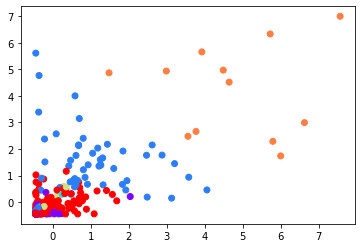

In [ ]:
kmeans = KMeans(n_clusters = 7).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [ ]:
cluster_labels = pd.DataFrame(kmeans.labels_)
final_dataset = pd.concat([fixdf, cluster_labels],axis = 1)
final_dataset

,Emiten_Code,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019,Market_Cap,0
0,AALI,0.043038,0.044501,0.030834,13.971410,0.021353,0.018299,28052332453475,3
1,ABBA,0.000082,0.022543,0.602394,0.007558,0.069875,0.056842,292043250000,1
2,ABDA,0.000000,0.000000,0.000000,2.514334,0.019688,0.033124,4330126593000,6
3,ABMM,0.000000,0.000000,0.000002,1.384784,0.048413,0.049502,4212342450000,0
4,ACES,0.049275,0.039534,0.069498,0.036339,0.023354,0.020383,25639250000000,6
...,...,...,...,...,...,...,...,...,...
491,WSKT,0.104255,0.217114,0.181769,0.026619,0.027529,0.022532,20157317235000,1
492,WTON,0.092250,0.104520,0.152632,0.109643,0.021954,0.026652,3921959970000,1
493,YPAS,0.000000,0.000000,0.000015,0.073310,0.080599,0.080263,367400048950,0
494,YULE,0.000424,0.000000,0.000028,0.086160,0.046535,0.079078,517650000000,0


In [ ]:
final_dataset.columns = ['Emiten_Code','MedVol_2017','MedVol_2018','MedVol_2019','SdClose_2017','SdClose_2018','SdClose_2019', 'Market_Cap', 'Cluster']
final_dataset.head()

,Emiten_Code,MedVol_2017,MedVol_2018,MedVol_2019,SdClose_2017,SdClose_2018,SdClose_2019,Market_Cap,Cluster
0,AALI,0.043038,0.044501,0.030834,13.971410,0.021353,0.018299,28052332453475,3
1,ABBA,0.000082,0.022543,0.602394,0.007558,0.069875,0.056842,292043250000,1
2,ABDA,0.000000,0.000000,0.000000,2.514334,0.019688,0.033124,4330126593000,6
3,ABMM,0.000000,0.000000,0.000002,1.384784,0.048413,0.049502,4212342450000,0
4,ACES,0.049275,0.039534,0.069498,0.036339,0.023354,0.020383,25639250000000,6


## **Cluster Profile**

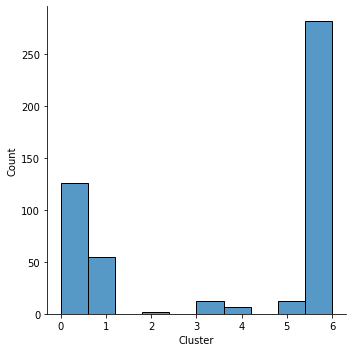

In [ ]:
import seaborn as sns
sns.displot(final_dataset, x="Cluster")

In [ ]:
df_new = final_dataset.groupby(['Cluster']).agg({'MedVol_2017': ['mean', 'median', 'min', 'max'], 'MedVol_2018': ['mean', 'median', 'min', 'max'], 'MedVol_2019': ['mean', 'median', 'min', 'max'],
                                                 'SdClose_2017': ['mean', 'median', 'min', 'max'], 'SdClose_2018': ['mean', 'median', 'min', 'max'], 'SdClose_2019': ['mean', 'median', 'min', 'max'],
                                                 'Market_Cap': ['mean', 'count']}).round(3)
print(df_new)                                    

        MedVol_2017                       ... SdClose_2019           Market_Cap      
               mean median    min    max  ...          min    max          mean count
Cluster                                   ...                                        
0             0.007  0.000  0.000  0.230  ...        0.038  0.145  2.493618e+12   126
1             0.133  0.106  0.000  0.417  ...        0.000  0.079  1.659260e+13    55
2             0.032  0.032  0.000  0.064  ...        0.000  0.024  9.844548e+12     2
3             0.006  0.000  0.000  0.043  ...        0.009  0.054  1.262718e+13    12
4             0.051  0.061  0.011  0.074  ...        0.010  0.021  4.208694e+14     7
5             0.478  0.464  0.178  0.742  ...        0.009  0.035  3.403154e+12    12
6             0.020  0.004  0.000  0.197  ...        0.000  0.040  8.079268e+12   282

[7 rows x 26 columns]


# **Export**

In [ ]:
final_dataset.to_excel('/content/drive/MyDrive/Colab Notebooks/IDX CLustering/Indonesia Stocks Market Data Clustering.xlsx')